In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense

In [2]:
# Generowanie danych losowych - trend liniowy
np.random.seed(0)
X = np.random.rand(100, 1)  # Generowanie 100 punktów losowych danych X
X = np.sort(X, axis=0) #sortuje macierz X wzdłuż osi 0, co oznacza sortowanie wzdłuż kolumn. Jeśli chcesz posortować wzdłuż wierszy, użyj axis=1.
y = 2 * X + 1 + np.random.randn(100, 1) * 0.01  # Generowanie danych y = 2X + 1 + szum

In [3]:
# Definiowanie modelu korzystając z metody 'add()' klasy 'Sequential()'
# https://keras.io/guides/sequential_model/
model = Sequential(name="ax_plus_bc")
model.add(Dense(1, input_shape=(1,)))  # Dodanie jednej warstwy Dense z jednym neuronem

In [4]:
# wypisanie wag
model.weights

[<tf.Variable 'dense/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[-1.2062402]], dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>]

In [5]:
# podsumowanie modelu
model.summary()

Model: "ax_plus_bc"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [6]:
'''
model = Sequential(
    [
        Dense(1, input_shape=(1,), name="warstwa_input"),
        Dense(2, activation="relu", name="warstwa_ukryta_hidden"),
        Dense(1, name="Warstwa_output"),
    ],name="siec_v2")
model.weights
model.summary()
'''

'\nmodel = Sequential(\n    [\n        Dense(1, input_shape=(1,), name="warstwa_input"),\n        Dense(2, activation="relu", name="warstwa_ukryta_hidden"),\n        Dense(1, name="Warstwa_output"),\n    ],name="siec_v2")\nmodel.weights\nmodel.summary()\n'

In [7]:
# Kompilacja modelu
model.compile(optimizer='SGD', loss='mean_squared_error')  # Kompilacja modelu z optymalizatorem SGD i funkcją straty MSE
# SGD (Stochastic Gradient Descent): Podstawowy optymalizator, który aktualizuje parametry w kierunku przeciwnym do gradientu funkcji straty.
# Adam (Adaptive Moment Estimation): Skuteczny optymalizator łączący zalety algorytmu momentum i RMSProp. Jest to często używany optymalizator ze względu na jego efektywność w wielu zastosowaniach.

In [8]:
# Trenowanie modelu
history = model.fit(X, y, epochs=100, verbose=0)  # Trenowanie modelu przez 1000 epok

In [9]:
# Przewidywanie na danych treningowych
predictions = model.predict(X)  # Wygenerowanie przewidywań modelu dla danych X

4/4 [==============================] - 0s 9ms/step


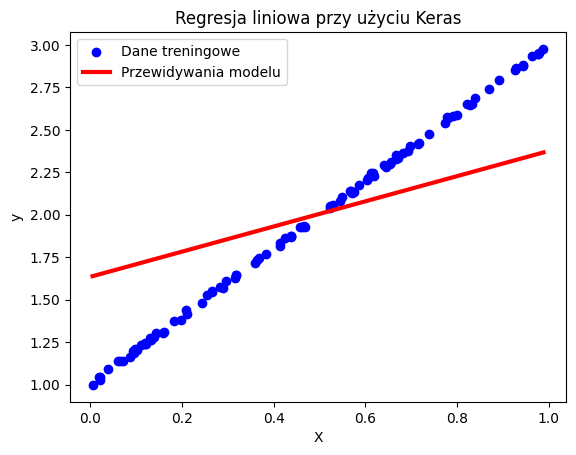

In [10]:
# Wykres danych treningowych i przewidywań modelu
plt.scatter(X, y, color='blue', label='Dane treningowe')  # Wykres danych treningowych
plt.plot(X, predictions, color='red', linewidth=3, label='Przewidywania modelu')  # Wykres przewidywań modelu
plt.xlabel('X')  # Etykieta osi X
plt.ylabel('y')  # Etykieta osi Y
plt.title('Regresja liniowa przy użyciu Keras')  # Tytuł wykresu
plt.legend()  # Dodanie legendy
plt.show()  # Wyświetlenie wykresu

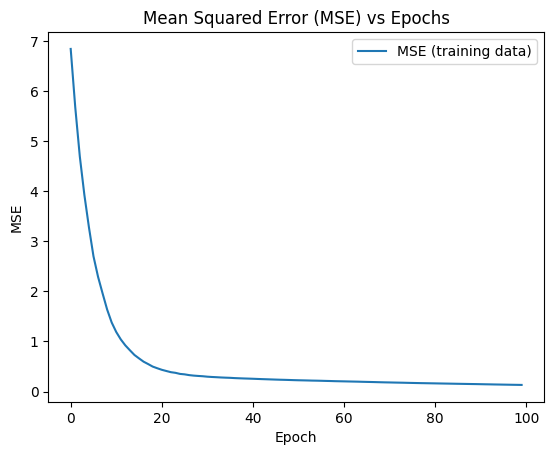

In [11]:
# Wykres MSE vs epoki
plt.plot(history.history['loss'], label='MSE (training data)')
plt.title('Mean Squared Error (MSE) vs Epochs')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(loc="upper right")
plt.show()

In [12]:
# Sprawdzanie wyników
print("Współczynniki regresji:")
weights = model.layers[0].get_weights()  # Pobranie wag modelu
print("W = {}, b = {}".format(weights[0][0][0], weights[1][0]))  # Wyświetlenie współczynników regresji

Współczynniki regresji:
W = 0.7411844730377197, b = 1.6347320079803467
